In [1]:
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from loveisland.common.constants import MALE, PALETTE, RELEVANT_ISLANDERS

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.style.use("bmh")

In [2]:
agg_path = "../data/aggregated/"

In [6]:
def get_sex(df):
    df["sex"] = df["islander"].apply(lambda x: "male" if x in MALE else "female")
    return df

def totals(df):
    df["total_favs"] = df["favs"] * df["n_tweets"]
    df["total_retwe"] = df["retwe"] * df["n_tweets"]
    return df

def standard_filters(df):
    return df[(df["n_tweets"] >= 100) & (df["islander"].isin(RELEVANT_ISLANDERS))]

In [7]:
df_list = [pd.read_csv(f) for f in glob.glob(agg_path + "*.csv")]
df = pd.concat(df_list, ignore_index=True)
df = standard_filters(df)

df["date"] = pd.to_datetime(df["date"])
df = get_sex(df)
df = totals(df)
df = df[df["n_tweets"] >= 100]
df.head()

,islander,favs,retwe,score,n_users,n_tweets,weight_senti,date,sex,total_favs,total_retwe
0,anton,47.921646,6.497888,-0.039377,7539,9942,2.326368,2019-06-03,male,476437.0,64602.0
1,curtis,50.169001,9.246499,0.144756,896,1071,2.859856,2019-06-03,male,53731.0,9903.0
2,danny,210.099010,27.544554,-0.090228,99,101,-89.765846,2019-06-03,male,21220.0,2782.0
4,michael,22.741907,2.447944,0.152268,1961,2286,1.687298,2019-06-03,male,51988.0,5596.0
6,tommy,72.846746,10.749535,-0.143625,3336,3765,-18.636478,2019-06-03,male,274268.0,40472.0


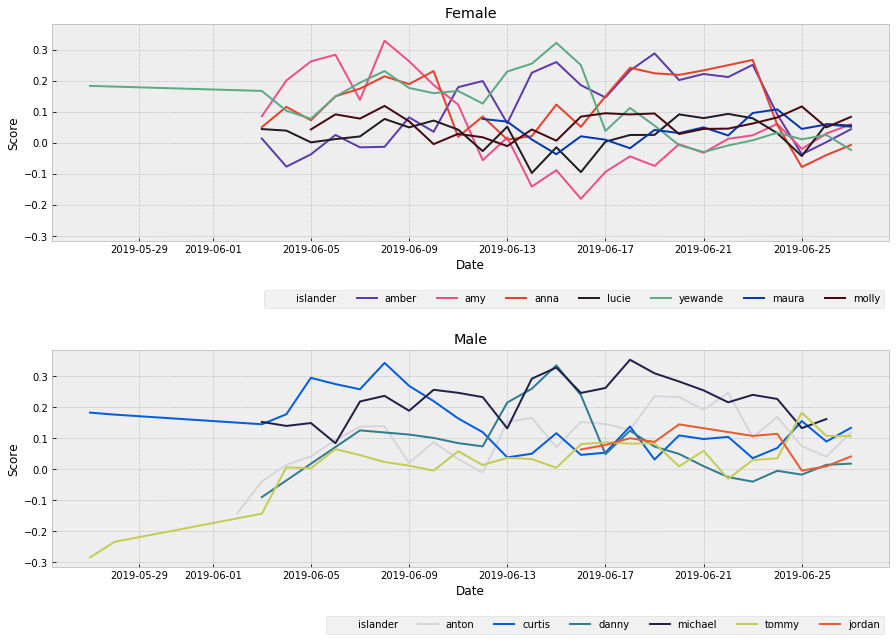

In [13]:
def add_meta(ax, metric, title):
    ax.legend(bbox_to_anchor=(1, -0.2), ncol=11)
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel(metric)
    return ax

args = {"x": "date", "y": "score", "hue": "islander", "palette": PALETTE}
    
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
sns.lineplot(data=df[df["sex"]=="female"], ax=ax1, **args)
ax1 = add_meta(ax1, "Score", "Female")

ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
sns.lineplot(data=df[df["sex"]=="male"], ax=ax2, **args)
ax2 = add_meta(ax2, "Score", "Male")

plt.subplots_adjust(hspace=0.5);

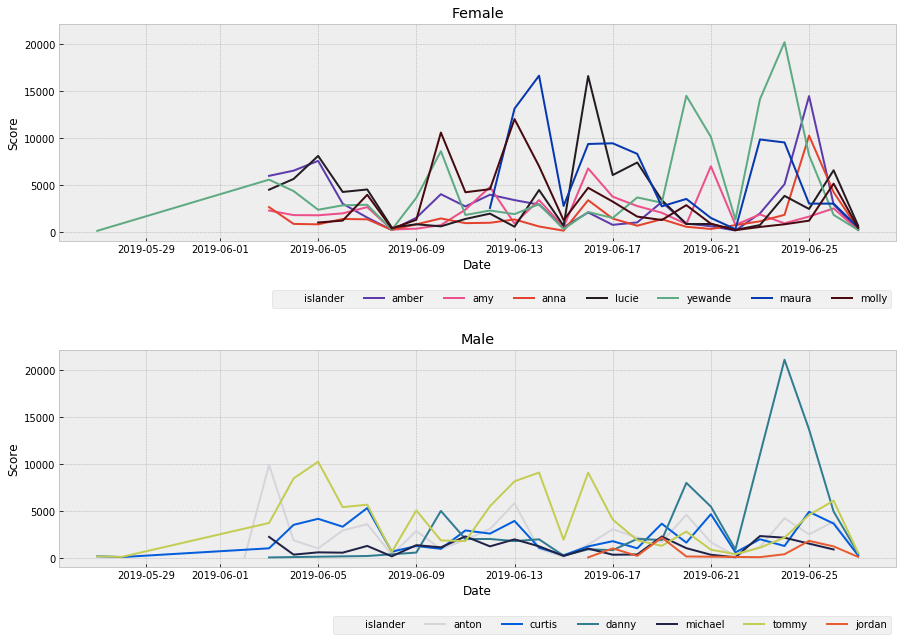

In [9]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
sns.lineplot("date", "n_tweets", "islander", data=df[df["sex"]=="female"], palette=PALETTE, ax=ax1)
ax1.legend(bbox_to_anchor=(1, -0.2), ncol=11)
ax1.set_title("Female")
ax1.set_xlabel("Date")
ax1.set_ylabel("Score")

ax2 = fig.add_subplot(212, sharex=ax1, sharey=ax1)
sns.lineplot("date", "n_tweets", "islander", data=df[df["sex"]=="male"], palette=PALETTE, ax=ax2)
ax2.legend(bbox_to_anchor=(1, -0.2), ncol=11)
ax2.set_title("Male")
ax2.set_xlabel("Date")
ax2.set_ylabel("Score")

plt.subplots_adjust(hspace=0.5);